***
#  <font color=blue>MACHINE LEARNING APLICADO EM CREDIT SCORING</font>
***

***
# <font color=blue>1. Dataset</font>
***

## <font color=blue>1.1. Contexto </font>

Neste projeto, vamos entender como o Machine Learning também está inserido no mercado financeiro. A concessão de crédito faz parte da nosso dia-a-dia, como: cartões de crédito, empréstimos pessoais e consignados, financiamento de veículos e imobiliários, são apenas alguns dos exemplos de como o crédito está inserido na nossa rotina.

**Os 04 pilares da Cadeia de Créditos:**
- Prospecção;
- Concessão;
- Gestão de Risco;
- Recuperação;

Entretanto, o contexto deste projeto é voltado para: ***Concessão de Crédito***

**Como Funciona:**

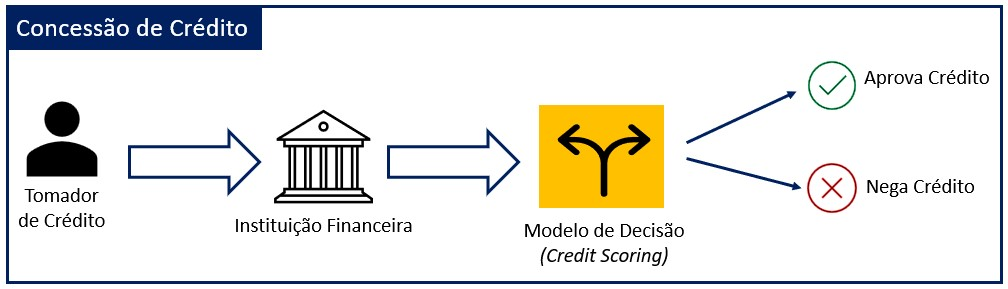


**Credit Scoring**

Ou "Pontuação de Crédito" conforme sua tradução, é um modelo estatístico multivariado que cria um modelo matemático e estima, através de uma probabilidade, a chance do nosso cliente ser adimplente ou inadimplente. Dependendo da pontuação o tomador receberá o crédito para o empréstimo.

A Regressão Logistica é a técnica mais utilizada no sistema financeiro e a qual iremos utilizar para classificar os possíveis eventos: adimplentes ou inadimplentes. 

## <font color=blue>1.2. Considerações </font>

Este conjunto de dados foi disponibilizado pelo Statlog (German Credit Data) dados reais, onde classifica as pessoas descritas por um conjunto de atributos como bons ou maus riscos de crédito.
- A Base de Dados disponibilizada já esta com as informações traduzidas conforme dicionário de dados disponibilizado;
- A Base de Dados contém ***informações sensíveis***, como o sexo da pessoa, a qual não deve ser considerado no modelo de acordo com as regulamentações do Banco Central.
- A variável `default` é a nossa variável resposta, onde: 0 = Credito Não Concedido | 1 = Crédito Concedido;

[Link do Dataset](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data))

## <font color=blue>1.3. Análise Exploratória dos Dados </font>

### <font color=blue>i) Importando bibliotecas e lendo o dataset</font>

In [1]:
# Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importando Base de Dados
dados = pd.read_csv('data/german_pt-br.csv')
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
# Verifica o nº de registros
count_classe_positiva= dados['default'].value_counts()[1]
freq_classe_positva= (count_classe_positiva/ dados.shape[0])*100

print(f'O Dataset possui {dados.shape[0]} registros e {dados.shape[1]} colunas')
print(f'Sendo {count_classe_positiva} registros de Classe Positiva(1), representando {round(freq_classe_positva,2)}% do total')

O Dataset possui 1000 registros e 21 colunas
Sendo 300 registros de Classe Positiva(1), representando 30.0% do total


### <font color=blue>ii) Verificando o dType, Dados Nulos/Ausentes e Dados Duplicados</font>

In [4]:
# Verificando o Dtype das colunas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [5]:
# Verificar dados nulos
dados.isnull().sum()

default                        0
conta_corrente                 0
prazo_emprestimo_meses         0
historico_credito              0
proposito_emprestimo           0
valor_emprestimo               0
reserva_cc                     0
tempo_emprego_atual            0
taxa_comp_salario              0
sexo_est_civil                 0
outros_fiadores                0
anos_residencia_atual          0
propriedade                    0
idade                          0
outros_planos_financiamento    0
tipo_residencia                0
n_creditos_banco               0
status_emprego                 0
n_dependentes                  0
telefone                       0
trabalhador_estrangeiro        0
dtype: int64

In [6]:
# Verificar dados duplicados
print(f'A Base de dados possui {dados.duplicated().sum()} dados duplicados')

A Base de dados possui 0 dados duplicados


### <font color=blue>iii) Analisando as Variáveis Numéricas</font>

In [7]:
# Describe das variáveis numéricas
variaveis_analise = ['idade', 'prazo_emprestimo_meses', 'valor_emprestimo', 'default']
dados[variaveis_analise].describe()

,idade,prazo_emprestimo_meses,valor_emprestimo,default
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,20.903000,3271.258000,0.300000
std,11.375469,12.058814,2822.736876,0.458487
min,19.000000,4.000000,250.000000,0.000000
25%,27.000000,12.000000,1365.500000,0.000000
50%,33.000000,18.000000,2319.500000,0.000000
75%,42.000000,24.000000,3972.250000,1.000000
max,75.000000,72.000000,18424.000000,1.000000


In [8]:
# Verificando a variável resposta (Variável Binária)
dados['default'].value_counts()

0    700
1    300
Name: default, dtype: int64

Nós temos 700 indivíduos na classe 0 e 300 indivíduos na classe 1. Se a classe 1 é a quantidade de créditos concedidos e a classe 0 é a quantidade de créditos negados, podemos perceber que a nossa **base é desbalanceada**. Por quê? Nós negamos muito mais crédito do que concedemos.

### <font color=blue>iv) Visualizando os Dados</font>

#### <font color=blue>Histograma</font>

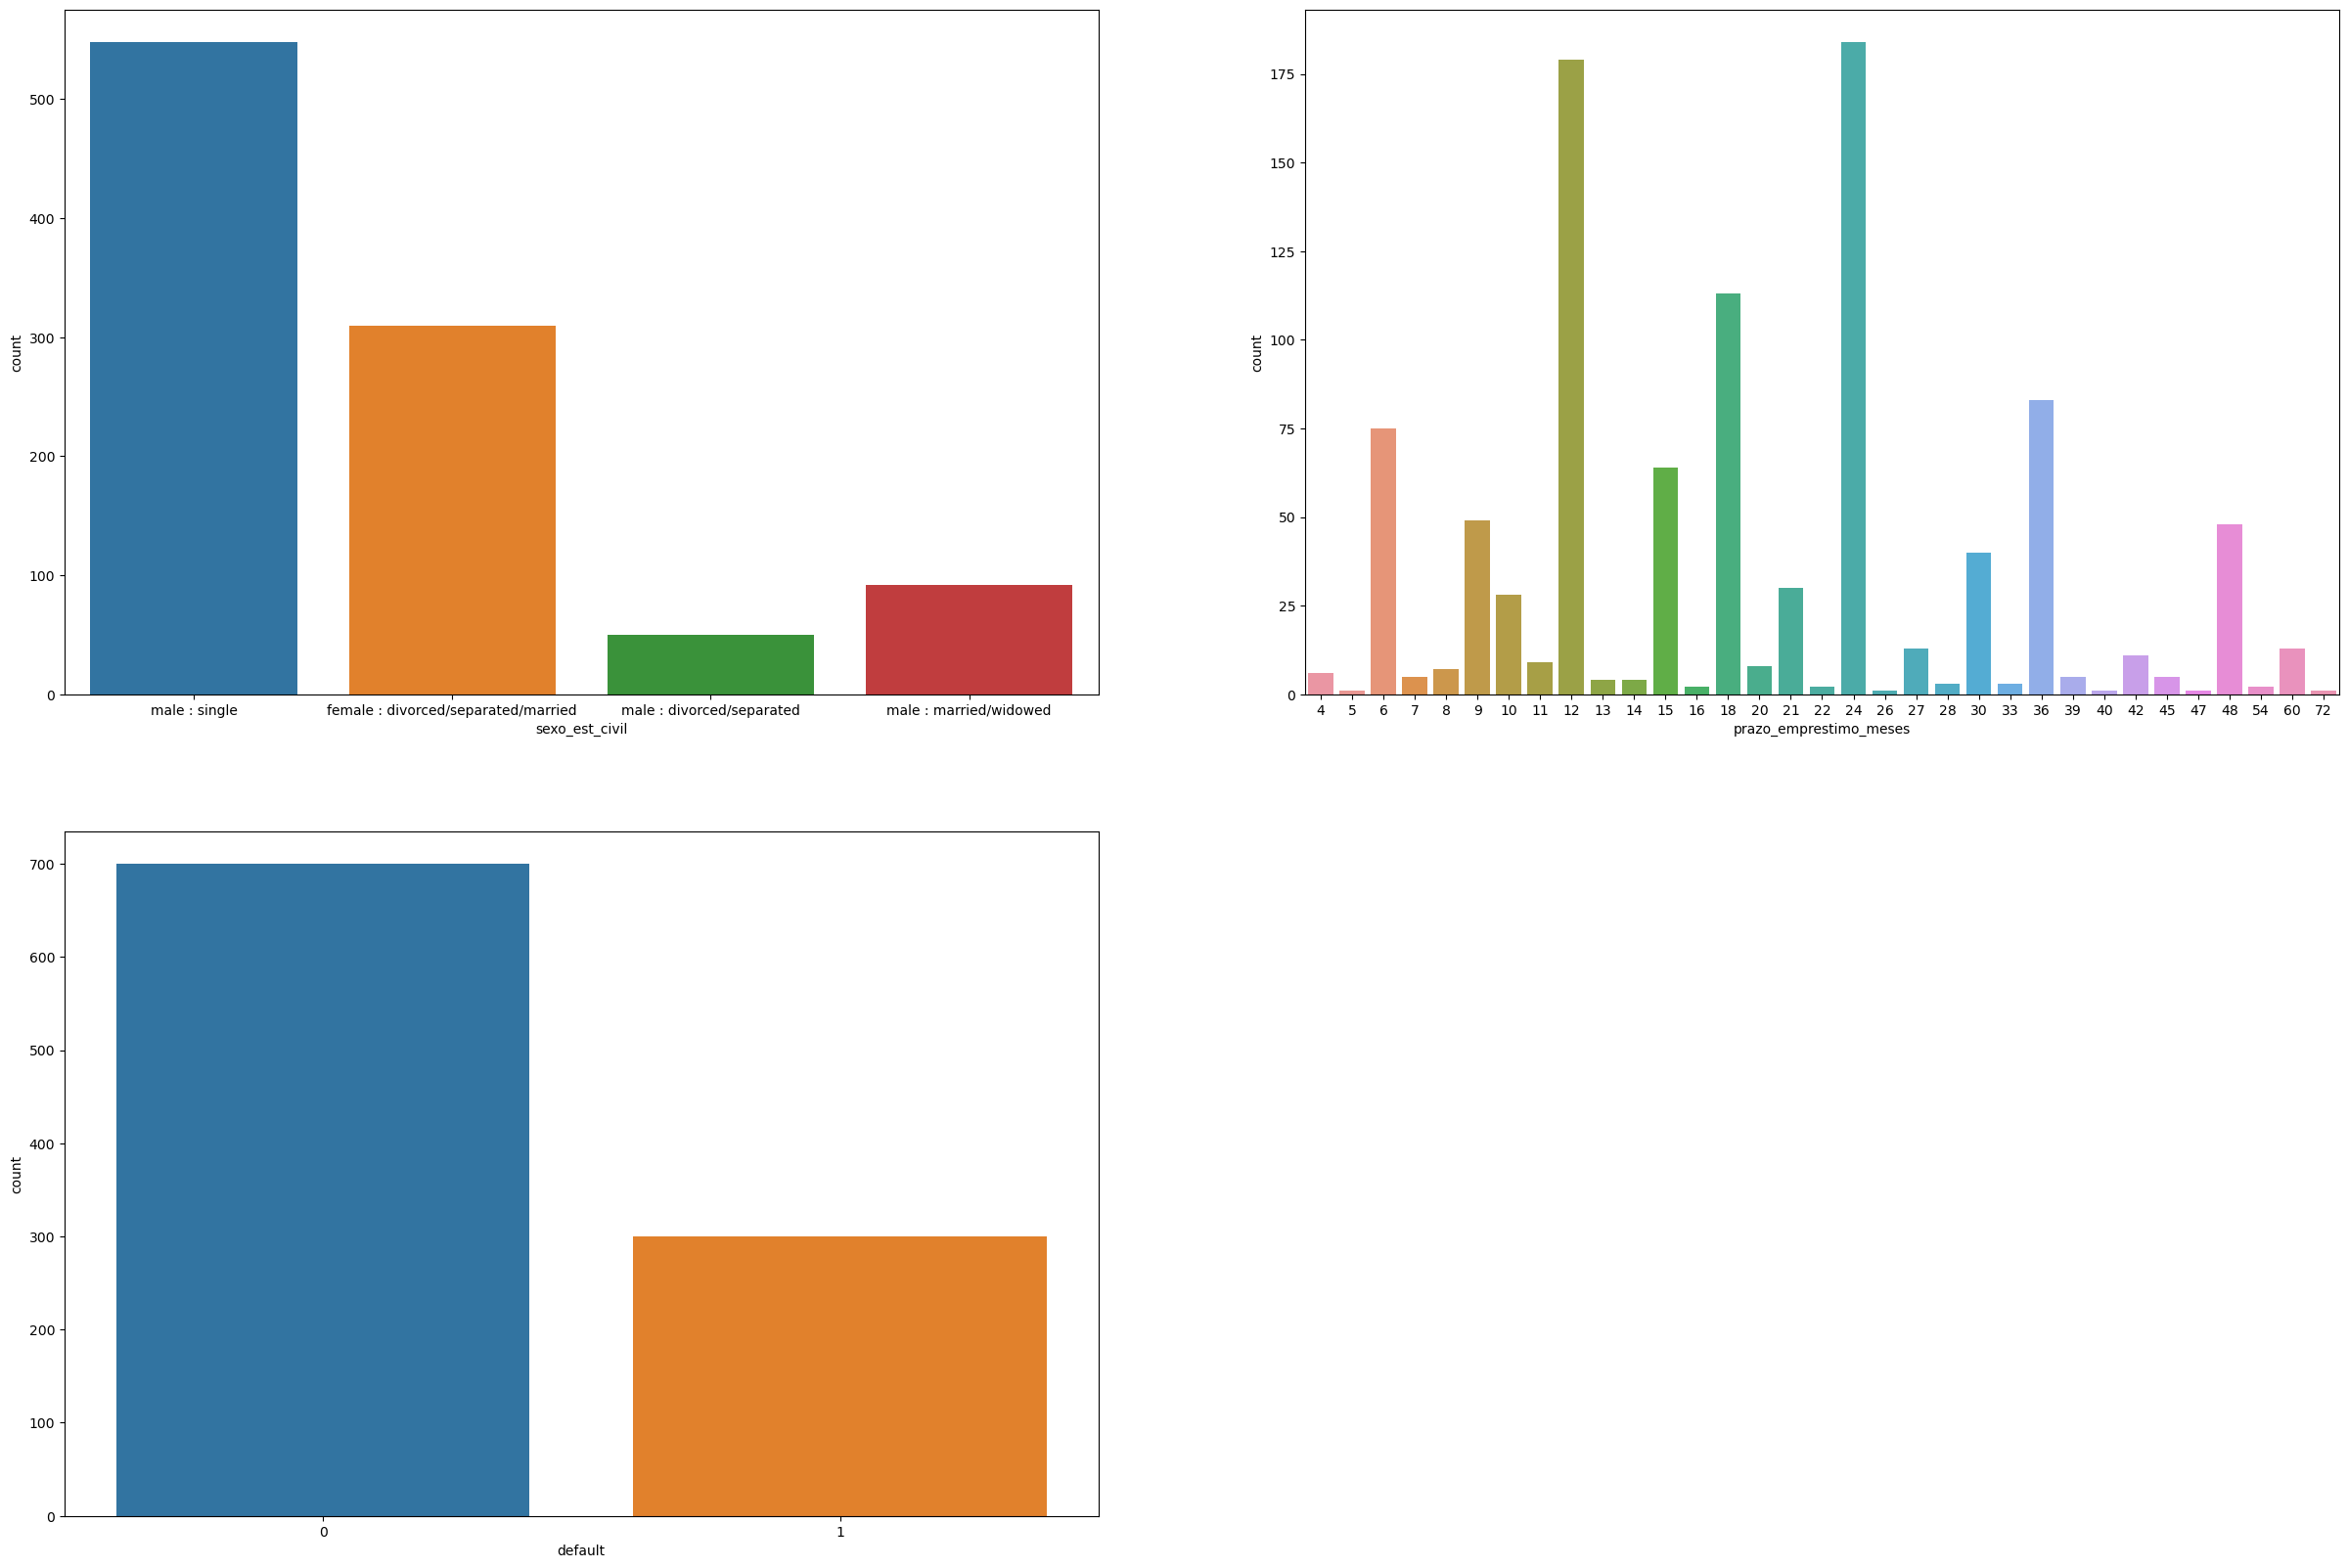

In [9]:
histogramas = ['sexo_est_civil', 'prazo_emprestimo_meses', 'default']

# enumera as variaveis para poder listar no loop for
lista_histogramas = list(enumerate(histogramas))

#define o tamanho da imagem
plt.figure(figsize = (30,20))

# Define o ta
for i in lista_histogramas:
    plt.subplot(2, 2, i[0]+1) # 1º arg é o num de colunas, 0 2º arg são linhas e o 3º arg é os indices dos histogramas q foram enumerados acima
    sns.countplot(x = i[1], data = dados) # é o histograma que desejo visualizar com a base dados = dados

#### <font color=blue>Boxplot</font>

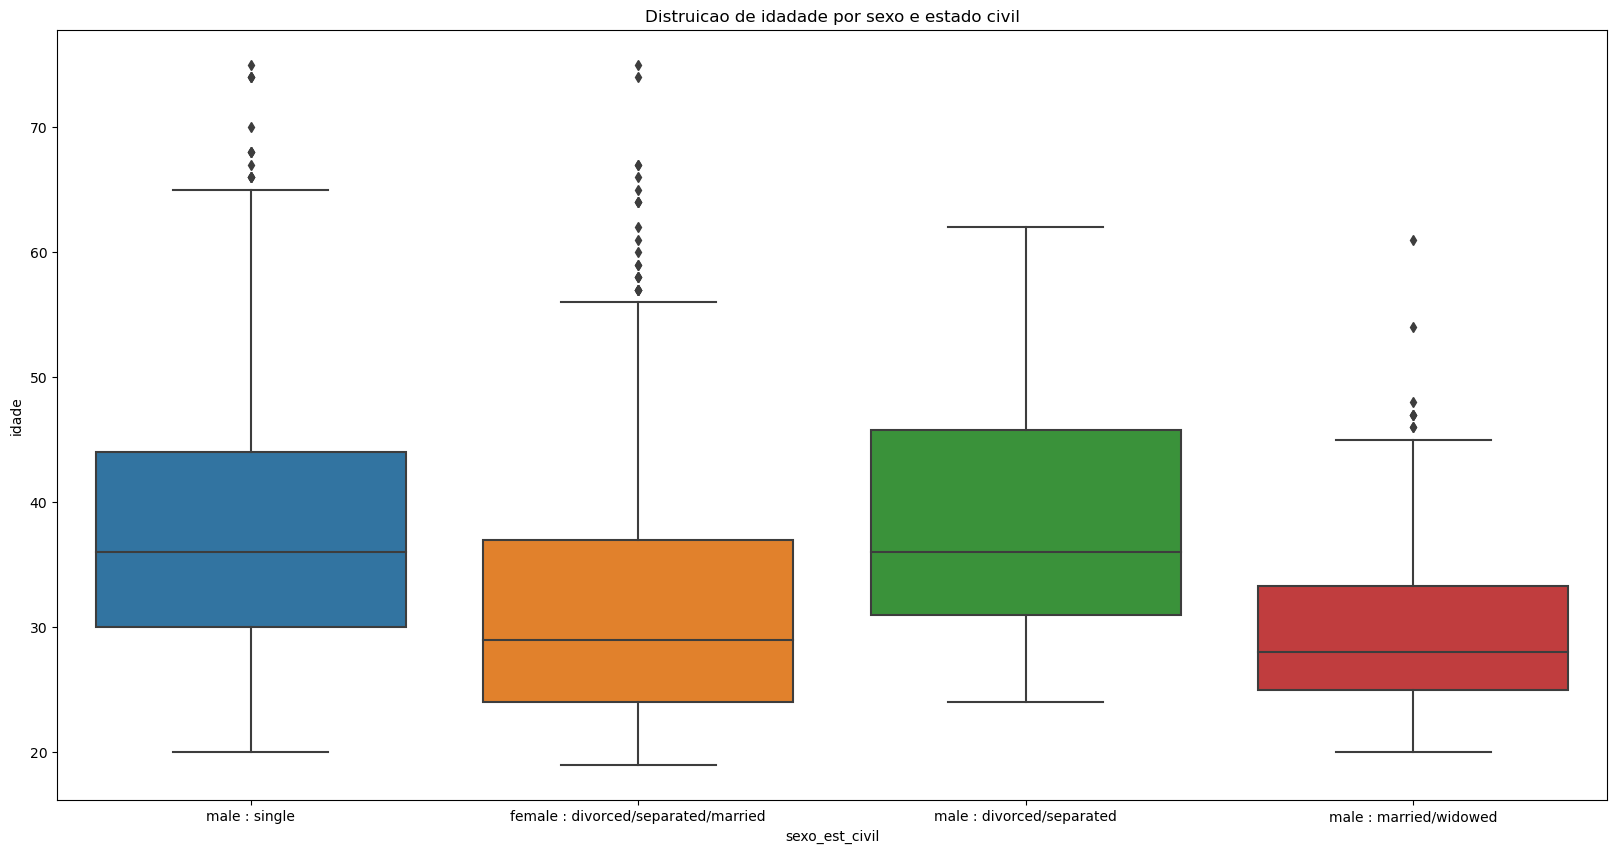

In [10]:
plt.figure(figsize = (20,10))
sns.boxplot(x = 'sexo_est_civil', y = 'idade', data = dados)
plt.title('Distruicao de idadade por sexo e estado civil')
plt.show()

#### <font color=blue>Gráfico de Barras</font>

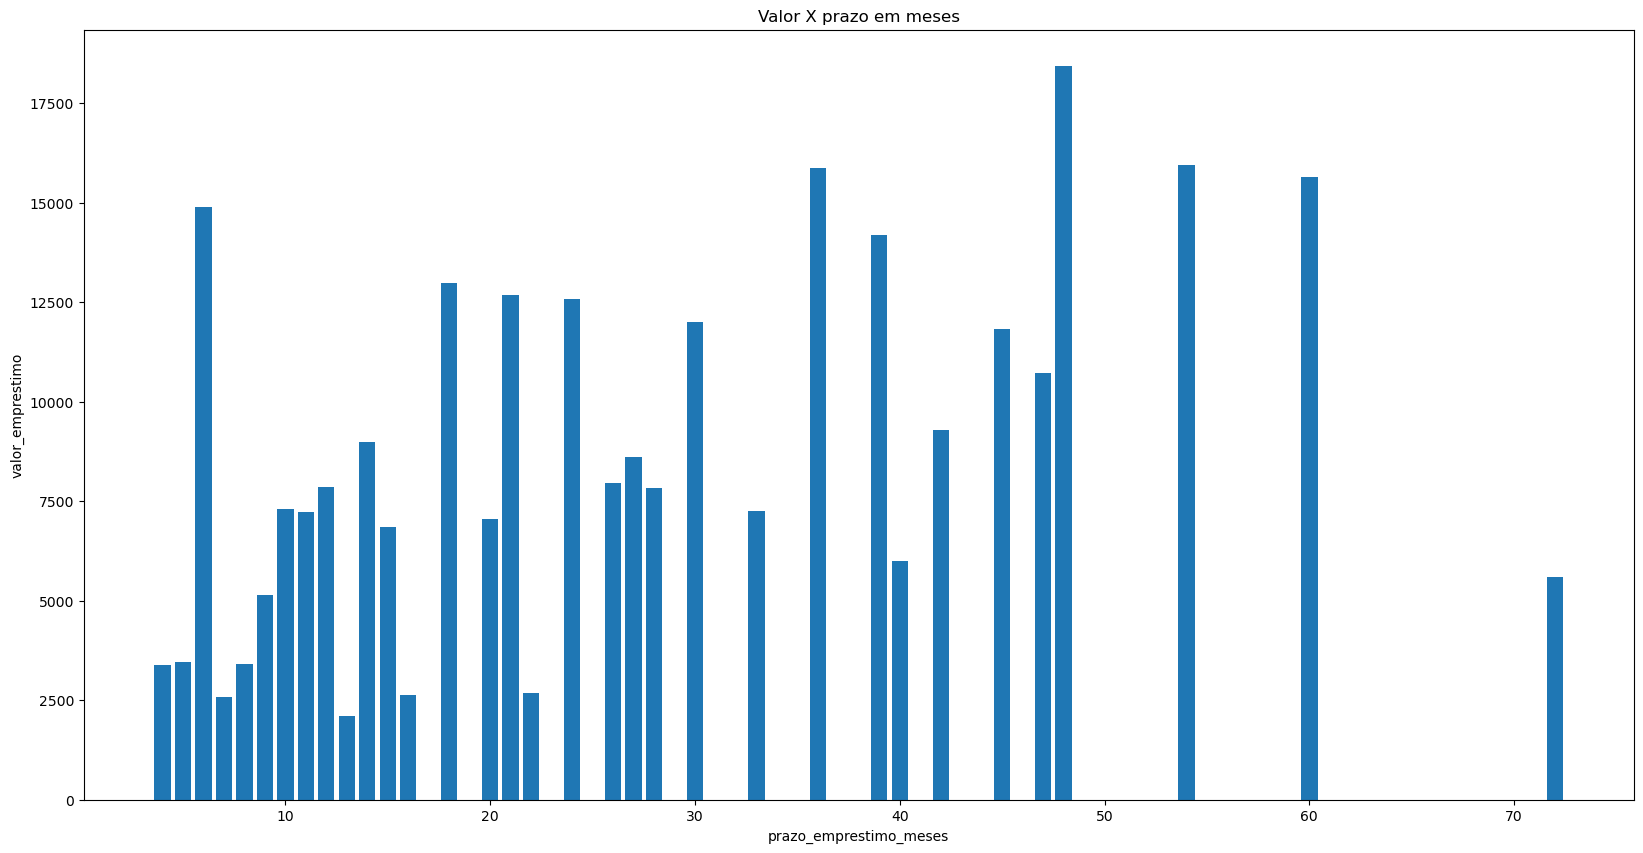

In [11]:
plt.figure(figsize = (20,10))
plt.bar(dados.prazo_emprestimo_meses, dados.valor_emprestimo)
plt.xlabel('prazo_emprestimo_meses')
plt.ylabel('valor_emprestimo')
plt.title('Valor X prazo em meses')

plt.show()

***
# <font color=blue> 2.Transformação dos Dados</font>
***

## <font color=blue> 2.1. Transformando Variáveis Categóricas em Númericas</font>

In [12]:
# COL. - Conta_Corrente
dados['conta_corrente'].unique()

array(['< 0 DM', '0 <= ... < 200 DM', 'no checking account',
       '>= 200 DM / salary assignments for at least 1 year'], dtype=object)

In [13]:
a = {
    '< 0 DM':1,
    '0 <= ... < 200 DM':2,
    'no checking account':3,
    '>= 200 DM / salary assignments for at least 1 year':4
}

dados['conta_corrente']= dados['conta_corrente'].map(a)

In [14]:
# COL. - historico_credito
dados['historico_credito'].unique()

array(['critical account/ other credits existing (not at this bank)',
       'existing credits paid back duly till now',
       'delay in paying off in the past',
       'no credits taken/ all credits paid back duly',
       'all credits at this bank paid back duly'], dtype=object)

In [15]:
b = {
    'critical account/ other credits existing (not at this bank)':1,
    'existing credits paid back duly till now':2,
    'delay in paying off in the past':3,
    'no credits taken/ all credits paid back duly':4,
    'all credits at this bank paid back duly':5
}

dados['historico_credito']= dados['historico_credito'].map(b)

In [16]:
# COL. - proposito_emprestimo
dados['proposito_emprestimo'].unique()

array(['domestic appliances', '(vacation - does not exist?)',
       'radio/television', 'car (new)', 'car (used)', 'business',
       'repairs', 'education', 'furniture/equipment', 'retraining'],
      dtype=object)

In [17]:
c = {
    'domestic appliances':1,
    '(vacation - does not exist?)':2,
    'radio/television':3,
    'car (new)':4,
    'car (used)':5,
    'business': 6,
    'repairs':7,
    'education':8,
    'furniture/equipment':9,
    'retraining':10
}

dados['proposito_emprestimo']= dados['proposito_emprestimo'].map(c)

In [18]:
# COL. - reserva_cc
dados['reserva_cc'].unique()

array(['unknown/ no savings account', '... < 100 DM',
       '500 <= ... < 1000 DM ', '.. >= 1000 DM ', '100 <= ... < 500 DM'],
      dtype=object)

In [19]:
d = {
    'unknown/ no savings account':1,
    '... < 100 DM':2,
    '500 <= ... < 1000 DM ':3,
    '.. >= 1000 DM ':4,
    '100 <= ... < 500 DM':5,
}

dados['reserva_cc']= dados['reserva_cc'].map(d)

In [20]:
# COL. - tempo_emprego_atual
dados['tempo_emprego_atual'].unique()

array(['.. >= 7 years', '1 <= ... < 4 years', '4 <= ... < 7 years',
       'unemployed', '... < 1 year '], dtype=object)

In [21]:
e = {
    '.. >= 7 years':1,
    '1 <= ... < 4 years':2,
    '4 <= ... < 7 years':3,
    'unemployed':4,
    '... < 1 year ':5,
}

dados['tempo_emprego_atual']= dados['tempo_emprego_atual'].map(e)

In [22]:
# COL. - sexo_est_civil
dados['sexo_est_civil'].unique()

array(['male : single', 'female : divorced/separated/married',
       'male : divorced/separated', 'male : married/widowed'],
      dtype=object)

In [23]:
f = {
    'male : single':1,
    'female : divorced/separated/married':2,
    'male : divorced/separated':3,
    'male : married/widowed':4
}

dados['sexo_est_civil']= dados['sexo_est_civil'].map(f)

In [24]:
# COL. - propriedade
dados['propriedade'].unique()

array(['real estate',
       'if not A121 : building society savings agreement/ life insurance',
       'unknown / no property',
       'if not A121/A122 : car or other, not in attribute 6'],
      dtype=object)

In [25]:
g = {
    'real estate':1,
    'if not A121 : building society savings agreement/ life insurance':2,
    'unknown / no property':3,
    'if not A121/A122 : car or other, not in attribute 6':4
}

dados['propriedade']= dados['propriedade'].map(g)

In [26]:
# COL. - outros_planos_financiamento
dados['outros_planos_financiamento'].unique()

array(['none', 'bank', 'stores'], dtype=object)

In [27]:
h = {
    'none':1,
    'bank':2,
    'stores':3
}

dados['outros_planos_financiamento']= dados['outros_planos_financiamento'].map(h)

In [28]:
# COL. - tipo_residencia
dados['tipo_residencia'].unique()

array(['own', 'for free', 'rent'], dtype=object)

In [29]:
i = {
    'own':1,
    'for free':2,
    'rent':3
}

dados['tipo_residencia']= dados['tipo_residencia'].map(i)

In [30]:
# COL. - status_emprego
dados['status_emprego'].unique()

array(['skilled employee / official', 'unskilled - resident',
       'management/ self-employed/ highly qualified employee/ officer',
       'unemployed/ unskilled - non-resident'], dtype=object)

In [31]:
j = {
    'skilled employee / official':1,
    'unskilled - resident':2,
    'management/ self-employed/ highly qualified employee/ officer':3,
    'unemployed/ unskilled - non-resident':4,
}

dados['status_emprego']= dados['status_emprego'].map(j)

In [32]:
# COL. - Telefone
dados['telefone'].unique()

array(['yes, registered under the customers name ', 'none'], dtype=object)

In [33]:
l = {
    'yes, registered under the customers name ':1,
    'none':2
}

dados['telefone']= dados['telefone'].map(l)

In [34]:
# COL. - trabalhador_estrangeiro
dados['trabalhador_estrangeiro'].unique()

array(['yes', 'no'], dtype=object)

In [35]:
m = {
    'yes':1,
    'no':2
}

dados['trabalhador_estrangeiro']= dados['trabalhador_estrangeiro'].map(m)

In [36]:
# COL. - outros_fiadores
dados['outros_fiadores'].unique()

array(['none', 'guarantor', 'co-applicant'], dtype=object)

In [37]:
n = {
    'none':1,
    'guarantor':2,
     'co-applicant':3
}

dados['outros_fiadores']= dados['outros_fiadores'].map(n)

## <font color=blue>2.2. Adequando os Dados conforme Regulamentação do Banco Central ( Informações Sensíveis)</font>

No Brasil, os modelos de crédito são regulamentados e fiscalizados pelo Banco Central do Brasil e, por isso, às vezes, precisamos fazer a dissociação de duas informações que vêm agrupadas na base de dados para que, a informação não sensível, possa ser agregada ao modelo de classificação que estamos produzindo.

No projeto, trabalhamos com uma base alemã que veio com a informação de sexo e estado civil agrupadas, desta forma, é necessário desagrupar essas informações conforme regulamentações.

 Categorias da Variável 'sexo_est_civil'

    'male : single':1,
    'female : divorced/separated/married':2,
    'male : divorced/separated':3,
    'male : married/widowed':4
    'female: single' = 5

 Necessário criar 2 variáveis:

 1) Criando a Variável 'sexo':
     mulher = 1 | 
     homem = 0

 2) Criando Variável Estado Cívil:
     Solteira = 1 | 
     Casada/ divorciada/ viúva = 0

In [38]:
# Criando uma nova coluna com o Sexo e Estado Civil 
dic_sexo = {1:0, 2:1, 3:0, 4:0, 5:1}
dic_est_civil = {1:1, 2:0, 3:0, 4:0, 5:1}

dados['sexo']= dados['sexo_est_civil'].map(dic_sexo)
dados['estado_civil']= dados['sexo_est_civil'].map(dic_est_civil)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil
0,0,1,6,1,1,1169,1,1,4,1,...,67,1,1,2,1,1,1,1,0,1
1,1,2,48,2,1,5951,2,2,2,2,...,22,1,1,1,1,1,2,1,1,0
2,0,3,12,1,2,2096,2,3,2,1,...,49,1,1,1,2,2,2,1,0,1
3,0,1,42,2,3,7882,2,3,2,1,...,45,1,2,1,1,2,2,1,0,1
4,1,1,24,3,4,4870,2,2,3,1,...,53,1,2,2,1,2,2,1,0,1


## <font color=blue>2.2. Criando Faixas de Classificação </font>

Um aspecto que nós ainda não mencionamos e que é muito importante e relevante no sistema financeiro, é que neste sistema nós não analisamos o indivíduo. Nós analisamos o comportamento de um grupo e ajustamos esse indivíduo dentro de um grupo, Aqui, vamos fazer as faixas de classificação de três variáveis.

### <font color=blue> i) Faixa de Idade </font>

In [39]:
#criando 'faixa_idade' para variavel 'idade'

## 18 - 30 = 1
## 31 - 40 = 2
## 41 - 50 = 3
## 51 - 60 = 4
## 61 - 70 = 5
## 71 - 80 = 6

dados['faixa_idade'] = pd.cut(x = dados['idade'], bins=[18, 30, 40, 50, 60, 70, 80], labels = [1, 2, 3, 4, 5, 6])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade
0,0,1,6,1,1,1169,1,1,4,1,...,1,1,2,1,1,1,1,0,1,5
1,1,2,48,2,1,5951,2,2,2,2,...,1,1,1,1,1,2,1,1,0,1
2,0,3,12,1,2,2096,2,3,2,1,...,1,1,1,2,2,2,1,0,1,3
3,0,1,42,2,3,7882,2,3,2,1,...,1,2,1,1,2,2,1,0,1,3
4,1,1,24,3,4,4870,2,2,3,1,...,1,2,2,1,2,2,1,0,1,4


### <font color=blue> ii) Faixa de Prazo de Emprestimo </font>

In [40]:
#criando 'faixa_prazo_emprestimo' para variavel 'prazo_emprestimo_meses'

## 01 - 12 = 1
## 13 - 24 = 2
## 25 - 36 = 3
## 37 - 48 = 4
## 49 - 60 = 5
## 61 - 72 = 6

dados['faixa_prazo_emprestimo'] = pd.cut(x = dados['prazo_emprestimo_meses'], bins=[1, 12, 24, 36, 48, 60, 72], labels = [1, 2, 3, 4, 5, 6])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade,faixa_prazo_emprestimo
0,0,1,6,1,1,1169,1,1,4,1,...,1,2,1,1,1,1,0,1,5,1
1,1,2,48,2,1,5951,2,2,2,2,...,1,1,1,1,2,1,1,0,1,4
2,0,3,12,1,2,2096,2,3,2,1,...,1,1,2,2,2,1,0,1,3,1
3,0,1,42,2,3,7882,2,3,2,1,...,2,1,1,2,2,1,0,1,3,4
4,1,1,24,3,4,4870,2,2,3,1,...,2,2,1,2,2,1,0,1,4,2


### <font color=blue> iii) Faixa de Valor de de Emprestimo </font>

In [42]:
#criando 'faixa_valor_emprestimo' para variavel 'valor_emprestimo'

## 1 - 1000 = 1
## 1001 - 2000 = 2
## 2001 - 3000 = 3
## 3001 - 4000 = 4
## 4001 - 5000 = 5
## 5001 - 6000 = 6
## 6001 - 7000 = 7
## 7001 - 8000 = 8
## 8001 - 9000 = 9
## 9001 - 10000 = 10
## 10001 - 11000 = 11
## 11001 - 12000 = 12
## 12001 - 13000 = 13
## 13001 - 14000 = 14
## 14001 - 15000 = 15
## 15001 - 16000 = 16
## 16001 - 17000 = 17
## 17001 - 18000 = 18
## 18001 - 19000 = 19
## 19001 - 20000 = 20

dados['faixa_valor_emprestimo'] = pd.cut(x = dados['valor_emprestimo'], 
                                         bins=[1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000], 
                                         labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade,faixa_prazo_emprestimo,faixa_valor_emprestimo
0,0,1,6,1,1,1169,1,1,4,1,...,2,1,1,1,1,0,1,5,1,2
1,1,2,48,2,1,5951,2,2,2,2,...,1,1,1,2,1,1,0,1,4,6
2,0,3,12,1,2,2096,2,3,2,1,...,1,2,2,2,1,0,1,3,1,3
3,0,1,42,2,3,7882,2,3,2,1,...,1,1,2,2,1,0,1,3,4,8
4,1,1,24,3,4,4870,2,2,3,1,...,2,1,2,2,1,0,1,4,2,5


## <font color=blue>2.3. Deletando Variáveis não utilizadas </font>

In [44]:
colunas_deletadas = ['sexo_est_civil', 'sexo', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo']
base_dados = dados.drop(columns=colunas_deletadas)
base_dados.head()

,default,conta_corrente,historico_credito,proposito_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,estado_civil,faixa_idade,faixa_prazo_emprestimo,faixa_valor_emprestimo
0,0,1,1,1,1,1,4,1,4,1,...,1,2,1,1,1,1,1,5,1,2
1,1,2,2,1,2,2,2,1,2,1,...,1,1,1,1,2,1,0,1,4,6
2,0,3,1,2,2,3,2,1,3,1,...,1,1,2,2,2,1,1,3,1,3
3,0,1,2,3,2,3,2,2,4,2,...,2,1,1,2,2,1,1,3,4,8
4,1,1,3,4,2,2,3,1,4,3,...,2,2,1,2,2,1,1,4,2,5


***
# <font color=blue>3. Declaração de Funções</font>
***

## <font color=blue>3.1. Função Split</font>
**Objetivo:** Separar os Dados de Treino e Teste de forma proporcional devido os dados estarem desbalanceados, será usado o método Stratified Shuffle Split.

In [45]:
from sklearn.model_selection import train_test_split

def exec_split(x,y):
    treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size= 0.3, random_state=77)
    print(f'Treinaremos com {treino_x.shape[0]} e Testaremos com {teste_x.shape[0]} elementos')
    return  treino_x, teste_x, treino_y, teste_y

## <font color=blue>3.2. Função Classificador</font>
**Objetivo:** Gerar o Modelo, Realizar o Treino e retornar a Previsão

In [46]:
%%time
from sklearn.linear_model import LogisticRegression

def exec_classificador(modelo, treino_x, teste_x, treino_y):
    modelo.fit(treino_x, treino_y)
    pred_y = modelo.predict(teste_x)
    return pred_y

Wall time: 56.2 ms


## <font color=blue>3.3. Função Validador</font>
**Objetivo:** Gerar métricas para Validação do Modelo

In [47]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

def exec_validador(modelo, treino_x, treino_y, teste_x, teste_y, pred_y):
    print(f'Acurácia dos Dados de Treino {round(modelo.score(treino_x, treino_y)*100,3)}%')
    print(f"Acurácia dos Dados de Teste: {round((accuracy_score(teste_y, pred_y)*100),3)}% \n")
    print('Classification Report:\n',classification_report(teste_y, pred_y))
    
    print('Plotando a Matriz de Confusão:')
    plot_confusion_matrix(modelo, teste_x, teste_y, cmap='Blues')
    plt.show()
    
    # tfp = Taxa de Falsos Positivos | tvp = Taxa de Verdadeiros Positivos
    # Roc_curve irá gerar a curva
    prob_previsao = modelo.predict_proba(teste_x)[:,1]
    tfp, tvp, limite = roc_curve(teste_y, prob_previsao)

    print('Plotando a Curva ROC:')
    plt.subplots(1, figsize=(5,5))
    plt.title('Curva ROC')
    plt.plot(tfp,tvp)
    plt.xlabel('Especifidade')
    plt.ylabel('Sensibilidade')
    plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
    plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
    plt.show()
    
    print('Área da Curva (Roc_auc_Score):', round(roc_auc_score(teste_y, prob_previsao),3))

***
# <font color=blue> 4. Preparando os Dados </font>
***

In [48]:
# Separando os dados de Atributos (x) e Classe (y)
x= dados.drop(columns='default')
y= dados[['default']]

In [49]:
# Execução do Validador passando como parâmetro o split dos dados
x_train, x_test, y_train, y_test = exec_split(x, y)

Treinaremos com 700 e Testaremos com 300 elementos


***
# <font color=blue> 5. Gerando o Modelo </font>
***

In [50]:
#Gerando e Treinando o Modelo
modelo = LogisticRegression(max_iter=1000, random_state=77)
y_pred = exec_classificador(modelo, x_train, x_test, y_train)

C:\Users\reyna\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


***
# <font color=blue> 6. Gerando Métricas </font>
***

Acurácia dos Dados de Treino 75.714%
Acurácia dos Dados de Teste: 78.0% 

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       214
           1       0.66      0.48      0.55        86

    accuracy                           0.78       300
   macro avg       0.74      0.69      0.70       300
weighted avg       0.77      0.78      0.77       300

Plotando a Matriz de Confusão:


C:\Users\reyna\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


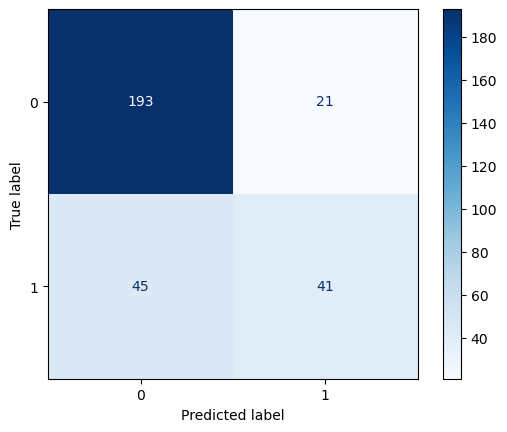

Plotando a Curva ROC:


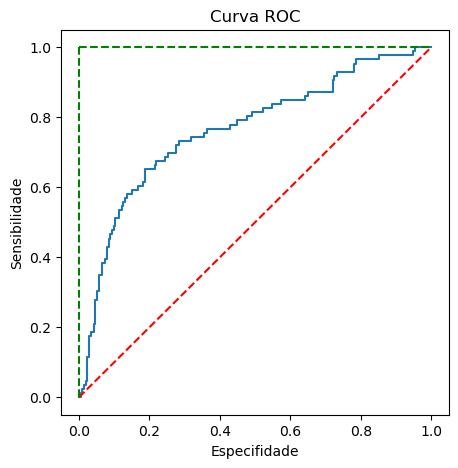

Área da Curva (Roc_auc_Score): 0.764


In [51]:
# Chama a função de Validação do Modelo
exec_validador(modelo, x_train, y_train, x_test, y_test, y_pred)

### Curva Roc

Muito importante porque ele traz uma nova perspectiva e novos argumentos sobre a calibragem da nossa regressão logística, do nosso modelo de classificação.

Considerações:

a ***linha vermelha***, que é aquela diagonal do gráfico, ela vai representar um **modelo completamente aleatório**. Ou seja, todas as previsões do meu modelo não seguem nenhuma tendência de dados, não seguem nenhuma regra, ela é completamente aleatória, cada hora o meu modelo prediz uma coisa aleatória.

Já a minha ***linha verde***, que é aquela linha guia que vem pela esquerda e sobe na parte superior do gráfico, indica um **modelo perfeito**. Ou seja, todas as predições que o meu modelo faz estão corretas. Como sabemos que ter um modelo perfeito ou ter um modelo aleatório é muito difícil, a nossa curva ROC estará sempre entre essas duas linhas guias aqui.

Como podem ver, a ***linha azul***, que é a curva ROC, ela está no meio do verde e do vermelho. E o que nós buscamos neste gráfico? Nós buscamos o mais próximo da linha verde possível. Nós queremos que a nossa curva ROC esteja mais próxima do canto superior esquerdo. Por que buscamos isso?

Porque ele vai maximizar a minha taxa de verdadeiros positivos e vai minimizar a minha taxa de falsos positivos. É isso o que nós encontramos, que buscamos esse trade-off entre verdadeiros positivos e falsos positivos, nós queremos maximizar um enquanto minimizamos o outro consequentemente.

### AUC 

Quantifica a Curva ROC através da área sob esta curva

**Convenção Estatística**:

- área < 0,7: baixa discriminiação
- 0,7 ≤ área < 0,8: discriminação aceitável
- 0,8 ≤ área < 0,9: discriminação excelente
- área > 0,9: discriminação excepcional

***
# <font color=blue> 7. Considerações Finais </font>
***


Olhando para as métricas, podemos perceber que a acurácia, por exemplo, não é um bom parâmetro para avaliarmos o modelo que foi desenvolvido em cima de uma base de dados desbalanceados, isso porque os parâmetros do modelo não diferenciam a classe majoritária da minoritária.
Através do cálcula da área ROC, obtivemos o valor de 0,764, que de acordo com a convenção estatística, temos uma discriminação aceitável.